#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [1]:
# Import packages
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitious you can use data from multiple months, thus addressing systematic errors as well

In [2]:
# Load September 2014 data in Pandas dataframe
import requests, zipfile, StringIO
r = requests.get('https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df = pd.read_csv(z.open('201409-citibike-tripdata.csv'))

print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

lets plot age in 5 year bins

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

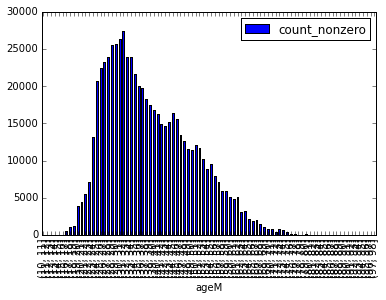

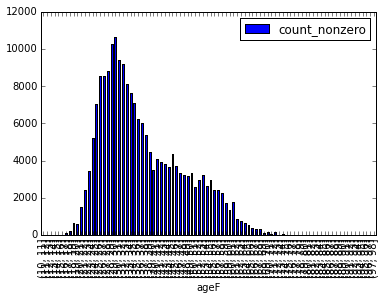

In [4]:
bins = np.arange(10, 99, 1)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 11]            NaN
(11, 12]            NaN
(12, 13]            NaN
(13, 14]            NaN
(14, 15]            NaN
(15, 16]            NaN
(16, 17]       0.000327
(17, 18]       0.001006
(18, 19]       0.000245
(19, 20]       0.002723
(20, 21]       0.002031
(21, 22]       0.001395
(22, 23]       0.007379
(23, 24]       0.012890
(24, 25]       0.015981
(25, 26]       0.023602
(26, 27]       0.029957
(27, 28]       0.036820
(28, 29]       0.048115
(29, 30]       0.061171
(30, 31]       0.067064
(31, 32]       0.070300
(32, 33]       0.073793
(33, 34]       0.074800
(34, 35]       0.076577
(35, 36]       0.076776
(36, 37]       0.076329
(37, 38]       0.074712
(38, 39]       0.069762
(39, 40]       0.061281
...                 ...
(68, 69]       0.004016
(69, 70]       0.003643
(70, 71]       0.002740
(71, 72]       0.002900
(72, 73]       0.001739
(73, 74]       0.001122
(74, 75]       0.000559
(75, 76]       0.000349
(76, 77]       0

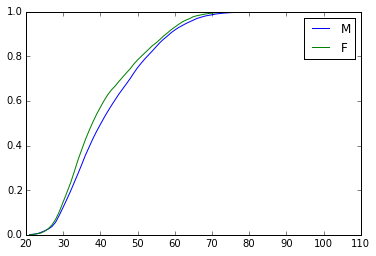

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [6]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [7]:
ks=scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print ks

Ks_2sampResult(statistic=0.07695305171793726, pvalue=0.0)


remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, s you do not have to worry about it i am still giving you the table FWI and if you want to do the coding of the KS test by hand


#Have you chosen your significance level yet?? you should do it first thing!

Yes, I choose my sigificance level at 0.05 and the p-value (0.0) < 0.05. Therefore, I can reject the null hypothesis that the two samples are pulled from the same underlying distribution. 

# OPTIONAL EXTRA CREDIT: code up KS test manually in Python


In [8]:
# Find the max absolute value distance between the two CDFs
diffs = np.abs(csM / csM.max()-csF / csF.max())

# Calculate critical value for sig. level 0.05
# http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
nM = np.count_nonzero(~np.isnan(df.ageM))
nF = np.count_nonzero(~np.isnan(df.ageF))

crit_val = 1.36*sqrt((nM+nF)/(nM*nF))

print 'statistic ', round(nanmax(diffs),4) , ' > critical value', crit_val
print 'Women and men do not appear to be drawn from the same distribution'
# Note: it seems very easy to reject the null hypothesis with this this test
#    given large sample sizes

statistic  0.0768  > critical value 0.0
Women and men do not appear to be drawn from the same distribution


#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [9]:
#please perform the Pearson's test and tell me what you find

# Set NaNs to 0 for ages not represented in each partition of the data set
csM[np.isnan(csM)] = 0
csF[np.isnan(csF)] = 0

pear = scipy.stats.pearsonr(csM, csF)
print 'Pearson\'s correlation coefficient: ', pear[0]
print 'p-value: ', pear[1]
print
print 'We can reject the null hypothesis that there is no correlation between the two samples.\n'
print 'The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.'

Pearson's correlation coefficient:  [ 0.81049774]
p-value:  [  1.10883772e-21]

We can reject the null hypothesis that there is no correlation between the two samples.

The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.


#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [10]:
#please perform the Spearman's test and tell me what you find
# This test does NOT assume that the two samples are normally distributed

spear = scipy.stats.spearmanr(csM, csF)
print 'Spearmman\'s correlation coefficient: ', spear[0]
print 'p-value: ', spear[1]
print
print 'We can reject the null hypothesis that there is no correlation between the two samples.\n'
print 'The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.'

Spearmman's correlation coefficient:  0.690711706791
p-value:  9.58292603253e-14

We can reject the null hypothesis that there is no correlation between the two samples.

The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.


##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

##DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

# KS Test

In [11]:
# Convert starttime to datetime data type, then get hour only
df['starttime2'] = pd.to_datetime(df['starttime'])
df['starthour'] = [start.hour for start in df['starttime2']]
print df['starthour'].head()
#print df['starthour'].describe()

0    0
1    0
2    0
3    0
4    0
Name: starthour, dtype: int64


In [12]:
# Split the data by morning (5am-11am) and night (5pm-12am) riders, keeping same restrictions on Subscribers only
df['ageAM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ( df['starthour'] >= 5) & (df['starthour'] <= 11)]
df['agePM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starthour'] >= 17) ]

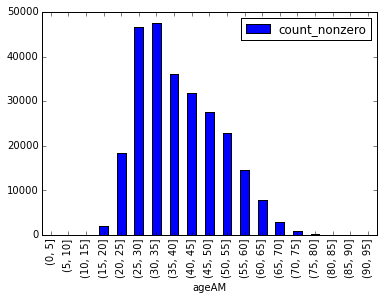

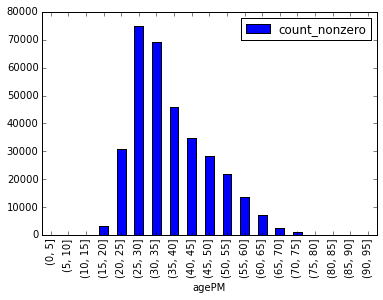

In [13]:
# Plot histograms
bins = np.arange(0, 99, 5)
df.ageAM.groupby(pd.cut(df.ageAM, bins)).agg([count_nonzero]).plot(kind='bar')
df.agePM.groupby(pd.cut(df.agePM, bins)).agg([count_nonzero]).plot(kind='bar')

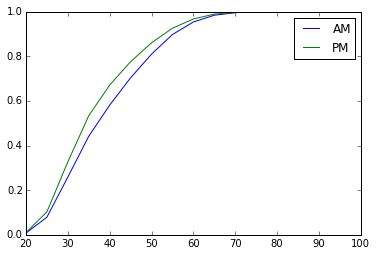

In [14]:
# Calculate CDFs and plot
csAM=df.ageAM.groupby(pd.cut(df.ageAM, bins)).agg([count_nonzero]).cumsum()
csPM=df.agePM.groupby(pd.cut(df.agePM, bins)).agg([count_nonzero]).cumsum()

pl.plot(bins[:-1] + 5, csAM / csAM.max(), label = "AM")
pl.plot(bins[:-1] + 5, csPM / csPM.max(), label = "PM")
pl.legend()

In [15]:
# Perform KS test
ks=scipy.stats.ks_2samp(df.ageAM[~np.isnan(df.ageAM)], df.agePM[~np.isnan(df.agePM)])
print ks

print 'AM riders and PM riders do not appear to be drawn from the same distribution'

Ks_2sampResult(statistic=0.093847436253994276, pvalue=0.0)
AM riders and PM riders do not appear to be drawn from the same distribution


# Pearson's test of correlation

In [16]:
# Set NaNs to 0 for ages not represented in each partition of the data set
csAM[np.isnan(csAM)] = 0
csPM[np.isnan(csPM)] = 0


pear = scipy.stats.pearsonr(csAM, csPM)
print 'Pearson\'s correlation coefficient: ', pear[0]
print 'p-value: ', pear[1]
print
print 'We can reject the null hypothesis that there is no correlation between the two samples.\n'
print 'The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.'

Pearson's correlation coefficient:  [ 0.86032738]
p-value:  [  2.30625071e-06]

We can reject the null hypothesis that there is no correlation between the two samples.

The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.


#Spearman's test of correlation

In [145]:
# This test does NOT assume that the two samples are normally distributed

spear = scipy.stats.spearmanr(csAM, csPM)
print 'Spearmman\'s correlation coefficient: ', spear[0]
print 'p-value: ', spear[1]
print
print 'We can reject the null hypothesis that there is no correlation between the two samples.\n'
print 'The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.'

Spearmman's correlation coefficient:  0.774936520622
p-value:  9.76219904233e-05

We can reject the null hypothesis that there is no correlation between the two samples.

The very low p-value represents the small probability that uncorrelated systems produced this correlation coeff.
